In [7]:
#Generate plots and conduct statistical analysis of extracted data
#Last updated 17 April 2021.
#Author: Shreya Deshmukh, Stanford University.

#Runs as a jupyter notebook through anaconda (on python version 2.7)

#Import the following libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from matplotlib import style
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, roc_curve, auc
import scipy
from scipy import stats
from scipy.stats import ranksums

import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import f_oneway

plt.rc('font',family='Arial')

#Define file path
#path = 'C:\\Users\\yourefiledirectories' #input the file path to where images are stored in the directory

In [8]:
#Main figures, plots generated from analysis of raw data 

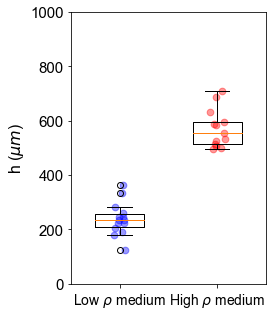

p-value: 2.3296277879875183e-12


In [9]:
#Fig 2a

#Load data
data = pd.read_csv('C:\Users\SSD_Laptop\Desktop\SD-notebook\Demirci\Data -ring stage paper, by figure\Fig. 2\Fig. 2a.csv')
names = ['Low $\\rho$ medium', 'High $\\rho$ medium']
df = data
dataset = data.values

lowdens=dataset[0:14,0]
highdens=dataset[0:13,1]

vals, names, xs = [],[],[]
for i, col in enumerate(df.columns):
    vals.append(df[col].values)
    names.append(col)
    xs.append(np.random.normal(i + 1, 0.04, df[col].values.shape[0]))  # adds jitter to the data points

plt.figure(figsize=(3.5,5))
plt.boxplot((lowdens,highdens), labels= ['Low $\\rho$ medium', 'High $\\rho$ medium'], widths=0.5)
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=15, rotation=0)
plt.ylim([0,1000])
plt.ylabel('h (${\mu}m$)', fontname='Arial', fontsize = 16)
palette = [ 'blue','red']
for x, val, c in zip(xs, vals, palette):
    plt.scatter(x, val, alpha=0.4, s=45, color=c)
plt.show()

#Welch's t-test on sample distribution
vals_arr = np.transpose(np.array([vals]))
t, prob = scipy.stats.ttest_ind(lowdens,highdens, equal_var=False)
print 'p-value:', prob 

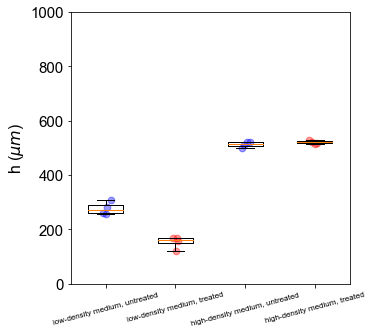

p-value, low dens: [0.000289]
p-value, high dens: [0.29574547]


In [10]:
#Fig 2b

#Load data
dataset = pd.read_csv('C:\Users\SSD_Laptop\Desktop\SD-notebook\Demirci\Data -ring stage paper, by figure\Fig. 2\Fig. 2b.csv')
df = pd.DataFrame(dataset, columns=['low-density medium, untreated','low-density medium, treated','high-density medium, untreated','high-density medium, treated'])

vals, names, xs = [],[],[]
for i, col in enumerate(df.columns):
    vals.append(df[col].values)
    names.append(col)
    xs.append(np.random.normal(i + 1, 0.04, df[col].values.shape[0]))  # adds jitter to the data points - can be adjusted

plt.figure(figsize=(5,5))
plt.boxplot(vals, labels=names, widths=0.5)
plt.xticks(fontsize=8, rotation=15)
plt.yticks(fontsize=15, rotation=0)
plt.ylim([0,1000])
plt.ylabel('h (${\mu}m$)', fontname='Arial', fontsize = 16)
palette = ['blue', 'red', 'blue' , 'red']
for x, val, c in zip(xs, vals, palette):
    plt.scatter(x, val, alpha=0.4, s=45, color=c)
plt.show()

#Welch's t-test on sample distribution
vals_arr = np.transpose(np.array([vals]))
t, prob = scipy.stats.ttest_ind(vals_arr[:,0],vals_arr[:,1], equal_var=False)
print 'p-value, low dens:', prob 

#Welch's t-test on sample distribution
vals_arr = np.transpose(np.array([vals]))
t, prob = scipy.stats.ttest_ind(vals_arr[:,2],vals_arr[:,3], equal_var=False)
print 'p-value, high dens:', prob 

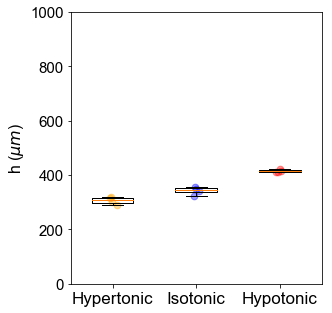

F_onewayResult(statistic=array([93.28796471]), pvalue=array([9.61993151e-07]))

In [11]:
#Fig. 2c

#Load data
dataset = pd.read_csv('C:\Users\SSD_Laptop\Desktop\SD-notebook\Demirci\Data -ring stage paper, by figure\Fig. 2\Fig. 2c.csv')
df = pd.DataFrame(dataset, columns=['Hypertonic','Isotonic','Hypotonic'])

vals, names, xs = [],[],[]
for i, col in enumerate(df.columns):
    vals.append(df[col].values)
    names.append(col)
    xs.append(np.random.normal(i + 1, 0.04, df[col].values.shape[0]))  # adds jitter to the data points - can be adjusted

plt.figure(figsize=(4.5,5))
plt.boxplot(vals, labels=names, widths=0.5)
plt.xticks(fontsize=17, rotation=0)
plt.yticks(fontsize=15, rotation=0)
plt.ylim([0,1000])
plt.ylabel('h (${\mu}m$)', fontname='Arial', fontsize = 16)
palette = ['orange', 'blue', 'red']
for x, val, c in zip(xs, vals, palette):
    plt.scatter(x, val, alpha=0.4, s=45, color=c)
plt.show()

#ANOVA one way
vals_arr = np.transpose(np.array([vals]))
f_oneway(vals_arr[:,0],vals_arr[:,1],vals_arr[:,2])

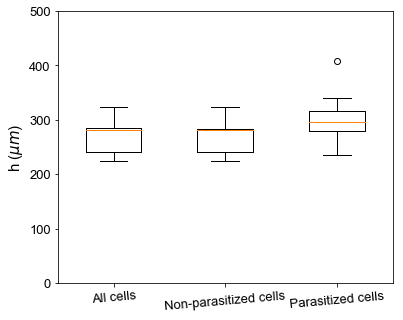

In [13]:
#Fig. 3c

#Load data
dataset = pd.read_csv('C:\Users\SSD_Laptop\Desktop\SD-notebook\Demirci\Data -ring stage paper, by figure\Fig. 3\Fig. 3c.csv', sep = ',', skip_blank_lines=True, warn_bad_lines=True)
df = dataset

vals, names, xs = [],[],[]
for i, col in enumerate(df.columns):
    vals.append(df[col].values)
    names.append(col)
    xs.append(np.random.normal(i + 1, 0.04, df[col].values.shape[0]))  # adds jitter to the data points - can be adjusted

plt.figure(figsize=(6,5))
plt.boxplot(vals, labels=names, widths=0.5)
plt.xticks(fontsize=13, rotation=5)
plt.yticks(fontsize=13, rotation=0)
plt.ylim([0,500])
plt.ylabel('h (${\mu}m$)', fontname='Arial', fontsize = 15)
palette = ['orange', 'blue', 'red']
#for x, val, c in zip(xs, vals, palette):
#    plt.scatter(x, val, alpha=0.4, s=45, color=c)
plt.show()

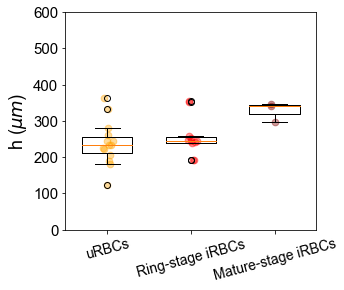

ANOVA: F_onewayResult(statistic=3.225057471125705, pvalue=0.05675082059426865)
p-value, uRBC to ring: 0.43704746935630867
p-value, uRBC to mature: 0.004992454668748493
p-value, ring to mature: 0.01562981914132907


In [14]:
#Fig. 3d (PBS stagewise separation with SLO-purified iRBCs)

#Load data
data = pd.read_csv('C:\Users\SSD_Laptop\Desktop\SD-notebook\Demirci\Data -ring stage paper, by figure\Fig. 3\Fig. 3d.csv')
df = data
dataset = data.values

uRBC=dataset[0:14,0]
ring=dataset[0:11,1]
mature = dataset[0:3,2]

vals, names, xs = [],[],[]
for i, col in enumerate(df.columns):
    vals.append(df[col].values)
    names.append(col)
    xs.append(np.random.normal(i + 1, 0.04, df[col].values.shape[0]))  # adds jitter to the data points - can be adjusted

    
plt.figure(figsize=(4.5,4))
plt.boxplot((uRBC,ring,mature), labels=['uRBCs','Ring-stage iRBCs','Mature-stage iRBCs'], widths=0.6)
plt.xticks(fontsize=14, rotation=15)
plt.yticks(fontsize=15, rotation=0)
plt.ylim([0,600])
plt.ylabel('h (${\mu}m$)', fontname='Arial', fontsize = 18)
palette = ['orange', 'red', 'maroon']
for x, val, c in zip(xs, vals, palette):
    plt.scatter(x, val, alpha=0.4, s=45, color=c)
plt.show()


#ANOVA one way
vals_arr = np.transpose(np.array([vals]))
ano = f_oneway(uRBC,ring,mature)
print "ANOVA:", ano

#Welch's t-test on sample distribution
t, prob = scipy.stats.ttest_ind(uRBC,ring, equal_var=False)
print 'p-value, uRBC to ring:', prob 

t, prob = scipy.stats.ttest_ind(uRBC,mature, equal_var=False)
print 'p-value, uRBC to mature:', prob 

t, prob = scipy.stats.ttest_ind(ring,mature, equal_var=False)
print 'p-value, ring to mature:', prob 

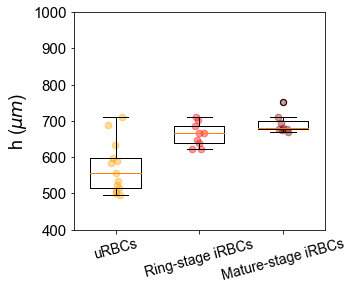

ANOVA: F_onewayResult(statistic=15.60912277619151, pvalue=3.126891295158771e-05)
p-value, uRBC to ring: 0.000735399916302456
p-value, uRBC to mature: 3.7702344049199306e-05
p-value, ring to mature: 0.05766733343123203


In [15]:
#Fig 3E (Percoll stagewise separation with SLO-purified iRBCs)

#Load data
data = pd.read_csv('C:\Users\SSD_Laptop\Desktop\SD-notebook\Demirci\Data -ring stage paper, by figure\Fig. 3\Fig. 3e.csv')
df = data
dataset = data.values

uRBC=dataset[0:13,0]
ring=dataset[0:9,1]
mature = dataset[0:8,2]


vals, names, xs = [],[],[]
for i, col in enumerate(df.columns):
    vals.append(df[col].values)
    names.append(col)
    xs.append(np.random.normal(i + 1, 0.04, df[col].values.shape[0]))  # adds jitter to the data points - can be adjusted

plt.figure(figsize=(4.5,4))
plt.boxplot((uRBC,ring,mature), labels=['uRBCs','Ring-stage iRBCs','Mature-stage iRBCs'], widths=0.6)
plt.xticks(fontsize=14, rotation=15)
plt.yticks(fontsize=15, rotation=0)
plt.ylim([400,1000])
plt.ylabel('h (${\mu}m$)', fontname='Arial', fontsize = 18)
palette = ['orange', 'red', 'maroon']
for x, val, c in zip(xs, vals, palette):
    plt.scatter(x, val, alpha=0.4, s=45, color=c)
plt.show()



#ANOVA one way
vals_arr = np.transpose(np.array([vals]))
ano = f_oneway(uRBC,ring,mature)
print "ANOVA:", ano

#Welch's t-test on sample distribution
t, prob = scipy.stats.ttest_ind(uRBC,ring, equal_var=False)
print 'p-value, uRBC to ring:', prob 

t, prob = scipy.stats.ttest_ind(uRBC,mature, equal_var=False)
print 'p-value, uRBC to mature:', prob 

t, prob = scipy.stats.ttest_ind(ring,mature, equal_var=False)
print 'p-value, ring to mature:', prob 


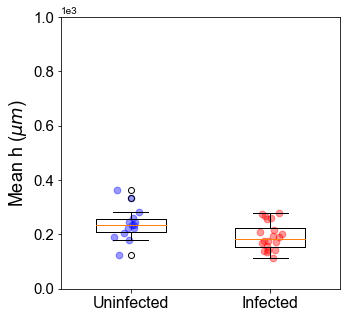

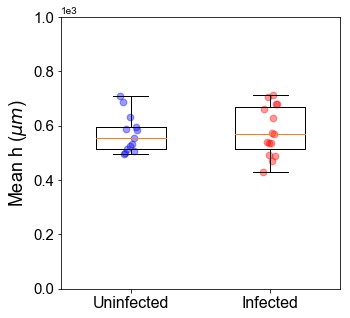

p-value, low dens: 0.031285882337004696
p-value, high dens: 0.7896777071224057


In [19]:
#Fig. 4a,b Mean
n = 1

#Load data
dataPBS = np.loadtxt(r'C:\Users\SSD_Laptop\Desktop\SD-notebook\Demirci\Data -ring stage paper, by figure\Fig. 4\Fig. 4a_lowdens.csv', delimiter=',', skiprows=1, encoding='utf-8-sig')
data_uPBS = np.array(dataPBS[0:14,n])
data_iPBS = dataPBS[14:34,n]

dataPerc = np.loadtxt('C:\Users\SSD_Laptop\Desktop\SD-notebook\Demirci\Data -ring stage paper, by figure\Fig. 4\Fig. 4b_highdens.csv', delimiter=',', skiprows=1, encoding='utf-8-sig')
data_uPerc = np.array(dataPerc[0:13,n])
data_iPerc = dataPerc[13:28,n]

smallmarker = dict(markersize=3)


#Plots
PBS = np.zeros((2,20))
PBS[0,0:14]=data_uPBS
PBS[1,:]=data_iPBS
PBS[ PBS==0 ] = np.nan

Perc = np.zeros((2,15))
Perc[0,0:13]=data_uPerc
Perc[1,:]=data_iPerc
Perc[Perc==0] = np.nan

#Plot 1 (low density medium)
dataset = np.transpose(PBS)
df = pd.DataFrame(dataset, columns=['Uninfected', 'Infected'])
df.head()


vals, names, xs = [],[],[]
for i, col in enumerate(df.columns):
    vals.append(df[col].values)
    names.append(col)
    xs.append(np.random.normal(i + 1, 0.04, df[col].values.shape[0]))  # adds jitter to the data points - can be adjusted


plt.figure(figsize=(5,5))
plt.boxplot((data_uPBS,data_iPBS), labels=names, widths=0.5)
plt.xticks(fontsize=16, rotation=0)
plt.yticks(fontsize=15, rotation=0)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,3))
plt.ylim([0,1000])
plt.ylabel('Mean h (${\mu}m$)', fontname='Arial', fontsize = 18)
palette = ['blue', 'red']
for x, val, c in zip(xs, vals, palette):
    plt.scatter(x, val, alpha=0.4, s=45, color=c)
plt.show()


#Plot 2 (high density medium)
dataset = np.transpose(Perc)
df = pd.DataFrame(dataset, columns=['Uninfected', 'Infected'])
df.head()

vals, names, xs = [],[],[]
for i, col in enumerate(df.columns):
    vals.append(df[col].values)
    names.append(col)
    xs.append(np.random.normal(i + 1, 0.04, df[col].values.shape[0]))  # adds jitter to the data points - can be adjusted


plt.figure(figsize=(5,5))
plt.boxplot((data_uPerc,data_iPerc), labels=names, widths=0.5)
plt.xticks(fontsize=16, rotation=0)
plt.yticks(fontsize=15, rotation=0)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,3))
plt.ylim([0,1000])
plt.ylabel('Mean h (${\mu}m$)', fontname='Arial', fontsize = 18)
palette = ['blue', 'red']
for x, val, c in zip(xs, vals, palette):
    plt.scatter(x, val, alpha=0.4, s=45, color=c)
plt.show()
    
#Welch's t-test on sample distribution
vals_arr = np.transpose(np.array([vals]))
t, prob = scipy.stats.ttest_ind(data_uPBS,data_iPBS, equal_var=False)
print 'p-value, low dens:', prob 

#Welch's t-test on sample distribution
vals_arr = np.transpose(np.array([vals]))
t, prob = scipy.stats.ttest_ind(data_uPerc,data_iPerc, equal_var=False)
print 'p-value, high dens:', prob 

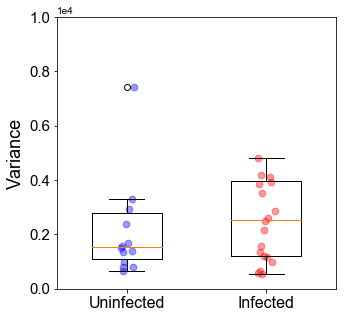

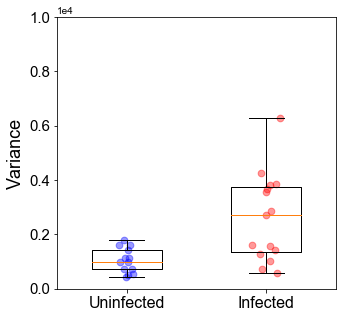

p-value, low dens: 0.29842986601649235
p-value, high dens: 0.0022658089327272707


In [20]:
#Fig. 4a,b Variance
n = 2

#Load data
dataPBS = np.loadtxt(r'C:\Users\SSD_Laptop\Desktop\SD-notebook\Demirci\Data -ring stage paper, by figure\Fig. 4\Fig. 4a_lowdens.csv', delimiter=',', skiprows=1, encoding='utf-8-sig')
data_uPBS = np.array(dataPBS[0:14,n])
data_iPBS = dataPBS[14:34,n]

dataPerc = np.loadtxt('C:\Users\SSD_Laptop\Desktop\SD-notebook\Demirci\Data -ring stage paper, by figure\Fig. 4\Fig. 4b_highdens.csv', delimiter=',', skiprows=1, encoding='utf-8-sig')
data_uPerc = np.array(dataPerc[0:13,n])
data_iPerc = dataPerc[13:28,n]

smallmarker = dict(markersize=3)



#Plots
PBS = np.zeros((2,20))
PBS[0,0:14]=data_uPBS
PBS[1,:]=data_iPBS
PBS[ PBS==0 ] = np.nan

Perc = np.zeros((2,15))
Perc[0,0:13]=data_uPerc
Perc[1,:]=data_iPerc
Perc[Perc==0] = np.nan

#Plot 1 (low density medium)
dataset = np.transpose(PBS)
df = pd.DataFrame(dataset, columns=['Uninfected', 'Infected'])
df.head()


vals, names, xs = [],[],[]
for i, col in enumerate(df.columns):
    vals.append(df[col].values)
    names.append(col)
    xs.append(np.random.normal(i + 1, 0.04, df[col].values.shape[0]))  # adds jitter to the data points - can be adjusted


plt.figure(figsize=(5,5))
plt.boxplot((data_uPBS,data_iPBS), labels=names, widths=0.5)
plt.xticks(fontsize=16, rotation=0)
plt.yticks(fontsize=15, rotation=0)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,3))
plt.ylim([0, 10000])
plt.ylabel('Variance', fontname='Arial', fontsize = 18)
palette = ['blue', 'red']
for x, val, c in zip(xs, vals, palette):
    plt.scatter(x, val, alpha=0.4, s=45, color=c)
plt.show()


#Plot 2 (high density medium)
dataset = np.transpose(Perc)
df = pd.DataFrame(dataset, columns=['Uninfected', 'Infected'])
df.head()

vals, names, xs = [],[],[]
for i, col in enumerate(df.columns):
    vals.append(df[col].values)
    names.append(col)
    xs.append(np.random.normal(i + 1, 0.04, df[col].values.shape[0]))  # adds jitter to the data points - can be adjusted


plt.figure(figsize=(5,5))
plt.boxplot((data_uPerc,data_iPerc), labels=names, widths=0.5)
plt.xticks(fontsize=16, rotation=0)
plt.yticks(fontsize=15, rotation=0)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,3))
plt.ylim([0, 10000])
plt.ylabel('Variance', fontname='Arial', fontsize = 18)
palette = ['blue', 'red']
for x, val, c in zip(xs, vals, palette):
    plt.scatter(x, val, alpha=0.4, s=45, color=c)
plt.show()
    
#Welch's t-test on sample distribution
vals_arr = np.transpose(np.array([vals]))
t, prob = scipy.stats.ttest_ind(data_uPBS,data_iPBS, equal_var=False)
print 'p-value, low dens:', prob 

#Welch's t-test on sample distribution
vals_arr = np.transpose(np.array([vals]))
t, prob = scipy.stats.ttest_ind(data_uPerc,data_iPerc, equal_var=False)
print 'p-value, high dens:', prob 

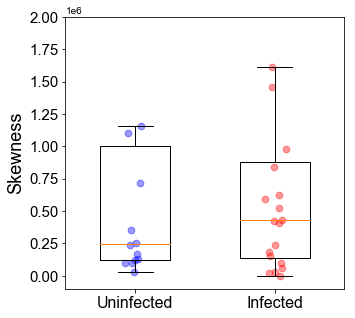

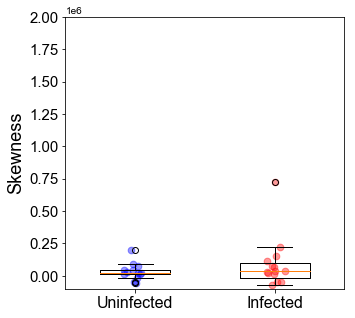

p-value, low dens: 0.2821170764530785
p-value, high dens: 0.727386758128255


In [21]:
#Fig. 4a,b Skewness
n = 3

#Load data
dataPBS = np.loadtxt(r'C:\Users\SSD_Laptop\Desktop\SD-notebook\Demirci\Data -ring stage paper, by figure\Fig. 4\Fig. 4a_lowdens.csv', delimiter=',', skiprows=1, encoding='utf-8-sig')
data_uPBS = np.array(dataPBS[0:14,n])
data_iPBS = dataPBS[14:34,n]

dataPerc = np.loadtxt('C:\Users\SSD_Laptop\Desktop\SD-notebook\Demirci\Data -ring stage paper, by figure\Fig. 4\Fig. 4b_highdens.csv', delimiter=',', skiprows=1, encoding='utf-8-sig')
data_uPerc = np.array(dataPerc[0:13,n])
data_iPerc = dataPerc[13:28,n]

smallmarker = dict(markersize=3)

    
#Plots
PBS = np.zeros((2,20))
PBS[0,0:14]=data_uPBS
PBS[1,:]=data_iPBS
PBS[ PBS==0 ] = np.nan

Perc = np.zeros((2,15))
Perc[0,0:13]=data_uPerc
Perc[1,:]=data_iPerc
Perc[Perc==0] = np.nan

#Plot 1 (low density medium)
dataset = np.transpose(PBS)
df = pd.DataFrame(dataset, columns=['Uninfected', 'Infected'])
df.head()


vals, names, xs = [],[],[]
for i, col in enumerate(df.columns):
    vals.append(df[col].values)
    names.append(col)
    xs.append(np.random.normal(i + 1, 0.04, df[col].values.shape[0]))  # adds jitter to the data points - can be adjusted


plt.figure(figsize=(5,5))
plt.boxplot((data_uPBS,data_iPBS), labels=names, widths=0.5)
plt.xticks(fontsize=16, rotation=0)
plt.yticks(fontsize=15, rotation=0)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,3))
plt.ylim([-100000, 2000000])
plt.ylabel('Skewness', fontname='Arial', fontsize = 18)
palette = ['blue', 'red']
for x, val, c in zip(xs, vals, palette):
    plt.scatter(x, val, alpha=0.4, s=45, color=c)
plt.show()


#Plot 2 (high density medium)
dataset = np.transpose(Perc)
df = pd.DataFrame(dataset, columns=['Uninfected', 'Infected'])
df.head()

vals, names, xs = [],[],[]
for i, col in enumerate(df.columns):
    vals.append(df[col].values)
    names.append(col)
    xs.append(np.random.normal(i + 1, 0.04, df[col].values.shape[0]))  # adds jitter to the data points - can be adjusted


plt.figure(figsize=(5,5))
plt.boxplot((data_uPerc,data_iPerc), labels=names, widths=0.5)
plt.xticks(fontsize=16, rotation=0)
plt.yticks(fontsize=15, rotation=0)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,3))
plt.ylim([-100000, 2000000])
plt.ylabel('Skewness', fontname='Arial', fontsize = 18)
palette = ['blue', 'red']
for x, val, c in zip(xs, vals, palette):
    plt.scatter(x, val, alpha=0.4, s=45, color=c)
plt.show()
    
#Welch's t-test on sample distribution
vals_arr = np.transpose(np.array([vals]))
t, prob = scipy.stats.ttest_ind(data_uPBS,data_iPBS, equal_var=False)
print 'p-value, low dens:', prob 

#Welch's t-test on sample distribution
vals_arr = np.transpose(np.array([vals]))
t, prob = scipy.stats.ttest_ind(data_uPerc,data_iPerc, equal_var=False)
print 'p-value, high dens:', prob 

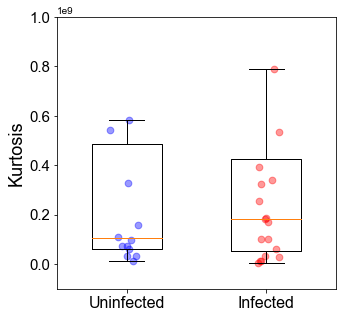

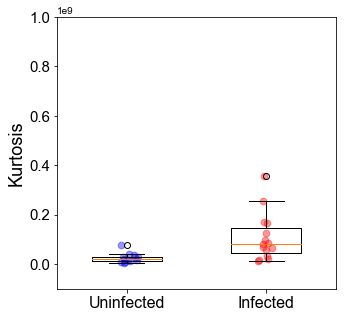

p-value, low dens: 0.22257236811848732
p-value, high dens: 0.005201815392365264


In [22]:
#Fig. 4a,b Kurtosis
n = 4

#Load data
dataPBS = np.loadtxt(r'C:\Users\SSD_Laptop\Desktop\SD-notebook\Demirci\Data -ring stage paper, by figure\Fig. 4\Fig. 4a_lowdens.csv', delimiter=',', skiprows=1, encoding='utf-8-sig')
data_uPBS = np.array(dataPBS[0:14,n])
data_iPBS = dataPBS[14:34,n]

dataPerc = np.loadtxt('C:\Users\SSD_Laptop\Desktop\SD-notebook\Demirci\Data -ring stage paper, by figure\Fig. 4\Fig. 4b_highdens.csv', delimiter=',', skiprows=1, encoding='utf-8-sig')
data_uPerc = np.array(dataPerc[0:13,n])
data_iPerc = dataPerc[13:28,n]

smallmarker = dict(markersize=3)


    
#Plots
PBS = np.zeros((2,20))
PBS[0,0:14]=data_uPBS
PBS[1,:]=data_iPBS
PBS[ PBS==0 ] = np.nan

Perc = np.zeros((2,15))
Perc[0,0:13]=data_uPerc
Perc[1,:]=data_iPerc
Perc[Perc==0] = np.nan

#Plot 1 (low density medium)
dataset = np.transpose(PBS)
df = pd.DataFrame(dataset, columns=['Uninfected', 'Infected'])
df.head()


vals, names, xs = [],[],[]
for i, col in enumerate(df.columns):
    vals.append(df[col].values)
    names.append(col)
    xs.append(np.random.normal(i + 1, 0.04, df[col].values.shape[0]))  # adds jitter to the data points - can be adjusted


plt.figure(figsize=(5,5))
plt.boxplot((data_uPBS,data_iPBS), labels=names, widths=0.5)
plt.xticks(fontsize=16, rotation=0)
plt.yticks(fontsize=15, rotation=0)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,3))
plt.ylim([-100000000, 1000000000])
plt.ylabel('Kurtosis', fontname='Arial', fontsize = 18)
palette = ['blue', 'red']
for x, val, c in zip(xs, vals, palette):
    plt.scatter(x, val, alpha=0.4, s=45, color=c)
plt.show()


#Plot 2 (high density medium)
dataset = np.transpose(Perc)
df = pd.DataFrame(dataset, columns=['Uninfected', 'Infected'])
df.head()

vals, names, xs = [],[],[]
for i, col in enumerate(df.columns):
    vals.append(df[col].values)
    names.append(col)
    xs.append(np.random.normal(i + 1, 0.04, df[col].values.shape[0]))  # adds jitter to the data points - can be adjusted


plt.figure(figsize=(5,5))
plt.boxplot((data_uPerc,data_iPerc), labels=names, widths=0.5)
plt.xticks(fontsize=16, rotation=0)
plt.yticks(fontsize=15, rotation=0)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,3))
plt.ylim([-100000000, 1000000000])
plt.ylabel('Kurtosis', fontname='Arial', fontsize = 18)
palette = ['blue', 'red']
for x, val, c in zip(xs, vals, palette):
    plt.scatter(x, val, alpha=0.4, s=45, color=c)
plt.show()
    
#Welch's t-test on sample distribution
vals_arr = np.transpose(np.array([vals]))
t, prob = scipy.stats.ttest_ind(data_uPBS,data_iPBS, equal_var=False)
print 'p-value, low dens:', prob 

#Welch's t-test on sample distribution
vals_arr = np.transpose(np.array([vals]))
t, prob = scipy.stats.ttest_ind(data_uPerc,data_iPerc, equal_var=False)
print 'p-value, high dens:', prob 

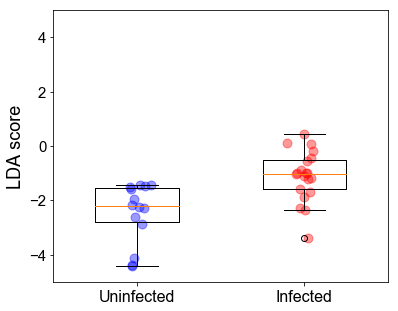

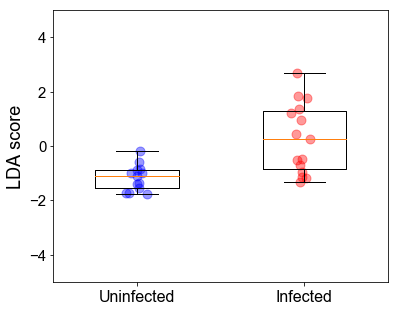

p-value, low dens: 0.0008512282291087241
p-value, high dens: 0.0007859302346163153
Rank-sum test, low density: -3.394292929285261 0.0006880605208800327
Rank-sum test, high density: -3.155476061978419 0.0016023641462250698


In [23]:
#Fig. 4a,b LDA scores
n = 0

#Load data
dataPBS = np.loadtxt(r'C:\Users\SSD_Laptop\Desktop\SD-notebook\Demirci\Data -ring stage paper, by figure\Fig. 4\LDAscoresALL_lowdens.csv', delimiter=',', encoding='utf-8-sig')
data_uPBS = np.array(dataPBS[0:14,n])
data_iPBS = dataPBS[14:34,n]

dataPerc = np.loadtxt('C:\Users\SSD_Laptop\Desktop\SD-notebook\Demirci\Data -ring stage paper, by figure\Fig. 4\LDAscoresALL_highdens.csv', delimiter=',', encoding='utf-8-sig')
data_uPerc = np.array(dataPerc[0:13,n])
data_iPerc = dataPerc[13:28,n]

smallmarker = dict(markersize=3)


#Plots
PBS = np.zeros((2,20))
PBS[0,0:14]=data_uPBS
PBS[1,:]=data_iPBS
PBS[ PBS==0 ] = np.nan

Perc = np.zeros((2,15))
Perc[0,0:13]=data_uPerc
Perc[1,:]=data_iPerc
Perc[Perc==0] = np.nan

#Plot 1 (low density medium)
dataset = np.transpose(PBS)
df = pd.DataFrame(dataset, columns=['Uninfected', 'Infected'])
df.head()


vals, names, xs = [],[],[]
for i, col in enumerate(df.columns):
    vals.append(df[col].values)
    names.append(col)
    xs.append(np.random.normal(i + 1, 0.04, df[col].values.shape[0]))  # adds jitter to the data points - can be adjusted


plt.figure(figsize=(6,5))
plt.boxplot((data_uPBS,data_iPBS), labels=names, widths=0.5)
plt.xticks(fontsize=16, rotation=0)
plt.yticks(fontsize=15, rotation=0)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,3))
plt.ylim([-5,5])
plt.ylabel('LDA score', fontname='Arial', fontsize = 18)
palette = ['blue', 'red']
for x, val, c in zip(xs, vals, palette):
    plt.scatter(x, val, alpha=0.4, s=80, color=c)
plt.show()


#Plot 2 (high density medium)
dataset = np.transpose(Perc)
df = pd.DataFrame(dataset, columns=['Uninfected', 'Infected'])
df.head()

vals, names, xs = [],[],[]
for i, col in enumerate(df.columns):
    vals.append(df[col].values)
    names.append(col)
    xs.append(np.random.normal(i + 1, 0.04, df[col].values.shape[0]))  # adds jitter to the data points - can be adjusted


plt.figure(figsize=(6,5))
plt.boxplot((data_uPerc,data_iPerc), labels=names, widths=0.5)
plt.xticks(fontsize=16, rotation=0)
plt.yticks(fontsize=15, rotation=0)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,3))
plt.ylim([-5,5])
plt.ylabel('LDA score', fontname='Arial', fontsize = 18)
palette = ['blue', 'red']
for x, val, c in zip(xs, vals, palette):
    plt.scatter(x, val, alpha=0.4, s=80, color=c)
plt.show()
    
#Welch's t-test on sample distribution
vals_arr = np.transpose(np.array([vals]))
t, prob = scipy.stats.ttest_ind(data_uPBS,data_iPBS, equal_var=False)
print 'p-value, low dens:', prob 

#Welch's t-test on sample distribution
vals_arr = np.transpose(np.array([vals]))
t, prob = scipy.stats.ttest_ind(data_uPerc,data_iPerc, equal_var=False)
print 'p-value, high dens:', prob 

#Wilcoxon's rank-sum test
s,p = ranksums(data_uPBS, data_iPBS)
print "Rank-sum test, low density:", s,p

sP, pP = ranksums(data_uPerc,data_iPerc)
print "Rank-sum test, high density:", sP, pP

In [61]:
print np.var(data_uPBS)
print np.var(data_iPBS)

108.00336830814709
57.53177524891042


#Fig. 4a,b LDA scores
n = 0

#Load data
dataPBS = np.loadtxt(r'C:\Users\SSD_Laptop\Desktop\SD-notebook\Demirci\Data -ring stage paper, by figure\Fig. 4\LDAscores_lowdens,11,0.3.csv', delimiter=',', encoding='utf-8-sig')
data_uPBS = np.array(dataPBS[0:14,n])
data_iPBS = dataPBS[14:34,n]

dataPerc = np.loadtxt('C:\Users\SSD_Laptop\Desktop\SD-notebook\Demirci\Data -ring stage paper, by figure\Fig. 4\LDAscores_highdens,11,0.3.csv', delimiter=',', encoding='utf-8-sig')
data_uPerc = np.array(dataPerc[0:13,n])
data_iPerc = dataPerc[13:28,n]

smallmarker = dict(markersize=3)


#Plots
PBS = np.zeros((2,20))
PBS[0,0:14]=data_uPBS
PBS[1,:]=data_iPBS
PBS[ PBS==0 ] = np.nan

Perc = np.zeros((2,15))
Perc[0,0:13]=data_uPerc
Perc[1,:]=data_iPerc
Perc[Perc==0] = np.nan

#Plot 1 (low density medium)
dataset = np.transpose(PBS)
df = pd.DataFrame(dataset, columns=['Uninfected', 'Infected'])
df.head()


vals, names, xs = [],[],[]
for i, col in enumerate(df.columns):
    vals.append(df[col].values)
    names.append(col)
    xs.append(np.random.normal(i + 1, 0.04, df[col].values.shape[0]))  # adds jitter to the data points - can be adjusted


plt.figure(figsize=(4,5))
plt.boxplot((data_uPBS,data_iPBS), labels=names, widths=0.5)
plt.xticks(fontsize=16, rotation=0)
plt.yticks(fontsize=15, rotation=0)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,3))
plt.ylim([-4,4])
plt.ylabel('LDA score', fontname='Arial', fontsize = 18)
palette = ['blue', 'red']
for x, val, c in zip(xs, vals, palette):
    plt.scatter(x, val, alpha=0.4, s=45, color=c)
plt.show()


#Plot 2 (high density medium)
dataset = np.transpose(Perc)
df = pd.DataFrame(dataset, columns=['Uninfected', 'Infected'])
df.head()

vals, names, xs = [],[],[]
for i, col in enumerate(df.columns):
    vals.append(df[col].values)
    names.append(col)
    xs.append(np.random.normal(i + 1, 0.04, df[col].values.shape[0]))  # adds jitter to the data points - can be adjusted


plt.figure(figsize=(4,5))
plt.boxplot((data_uPerc,data_iPerc), labels=names, widths=0.5)
plt.xticks(fontsize=16, rotation=0)
plt.yticks(fontsize=15, rotation=0)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,3))
plt.ylim([-4,4])
plt.ylabel('LDA score', fontname='Arial', fontsize = 18)
palette = ['blue', 'red']
for x, val, c in zip(xs, vals, palette):
    plt.scatter(x, val, alpha=0.4, s=45, color=c)
plt.show()
    
#Welch's t-test on sample distribution
vals_arr = np.transpose(np.array([vals]))
t, prob = scipy.stats.ttest_ind(data_uPBS,data_iPBS, equal_var=False)
print 'p-value, low dens:', prob 

#Welch's t-test on sample distribution
vals_arr = np.transpose(np.array([vals]))
t, prob = scipy.stats.ttest_ind(data_uPerc,data_iPerc, equal_var=False)
print 'p-value, high dens:', prob 

In [ ]:
#Supplementary figures, analysis & plots

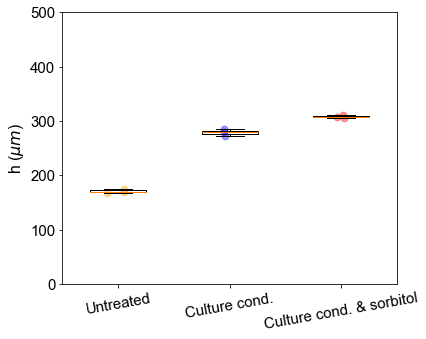

F_onewayResult(statistic=array([867.90797546]), pvalue=array([4.08739831e-08]))
p-value, untrt to medium only: [0.00010862]
p-value, untrt to medium + sorbitol: [6.31008652e-07]
p-value, medium only to medium + sorbitol: [0.0052807]


In [46]:
#Effect of culture conditions on uninfected RBCs
#low density medium

#Load data
dataset_lowdens = pd.read_csv('C:\Users\SSD_Laptop\Desktop\SD-notebook\Demirci\Data -ring stage paper, by figure\SI\Raw images\Fig. S5 Culture conditions on RBCs\Fig. culturecond_low.csv')
df = pd.DataFrame(dataset_lowdens, columns=['Untreated','Culture cond.','Culture cond. & sorbitol'])

vals, names, xs = [],[],[]
for i, col in enumerate(df.columns):
    vals.append(df[col].values)
    names.append(col)
    xs.append(np.random.normal(i + 1, 0.04, df[col].values.shape[0]))  # adds jitter to the data points - can be adjusted

plt.figure(figsize=(6,5))
plt.boxplot(vals, labels=names, widths=0.5)
plt.xticks(fontsize=15, rotation=10)
plt.yticks(fontsize=15, rotation=0)
plt.ylim([0,500])
plt.ylabel('h (${\mu}m$)', fontname='Arial', fontsize = 16)
palette = ['orange', 'blue', 'red']
for x, val, c in zip(xs, vals, palette):
    plt.scatter(x, val, alpha=0.4, s=45, color=c)
plt.show()

#ANOVA one way
vals_arr = np.transpose(np.array([vals]))
ano = f_oneway(vals_arr[:,0],vals_arr[:,1],vals_arr[:,2])
print ano

#Welch's t-test on sample distribution
vals_arr = np.transpose(np.array([vals]))
t, prob = scipy.stats.ttest_ind(vals_arr[:,0],vals_arr[:,1], equal_var=False)
print 'p-value, untrt to medium only:', prob 

#Welch's t-test on sample distribution
vals_arr = np.transpose(np.array([vals]))
t, prob = scipy.stats.ttest_ind(vals_arr[:,0],vals_arr[:,2], equal_var=False)
print 'p-value, untrt to medium + sorbitol:', prob 

#Welch's t-test on sample distribution
vals_arr = np.transpose(np.array([vals]))
t, prob = scipy.stats.ttest_ind(vals_arr[:,1],vals_arr[:,2], equal_var=False)
print 'p-value, medium only to medium + sorbitol:', prob 

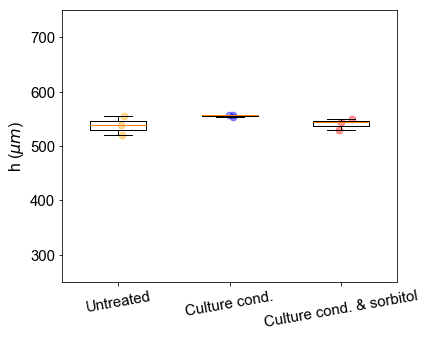

F_onewayResult(statistic=array([1.88513514]), pvalue=array([0.23159758]))
p-value, untrt to medium only: [0.22455874]
p-value, untrt to medium + sorbitol: [0.81927205]
p-value, medium only to medium + sorbitol: [0.13496136]


In [47]:
#Effect of culture conditions on uninfected RBCs
#high density medium

#Load data
dataset_highdens = pd.read_csv('C:\Users\SSD_Laptop\Desktop\SD-notebook\Demirci\Data -ring stage paper, by figure\SI\Raw images\Fig. S5 Culture conditions on RBCs\Fig. culturecond_high.csv')
df = pd.DataFrame(dataset_highdens, columns=['Untreated','Culture cond.','Culture cond. & sorbitol'])

vals, names, xs = [],[],[]
for i, col in enumerate(df.columns):
    vals.append(df[col].values)
    names.append(col)
    xs.append(np.random.normal(i + 1, 0.04, df[col].values.shape[0]))  # adds jitter to the data points - can be adjusted

plt.figure(figsize=(6,5))
plt.boxplot(vals, labels=names, widths=0.5)
plt.xticks(fontsize=15, rotation=10)
plt.yticks(fontsize=15, rotation=0)
plt.ylim([250,750])
plt.ylabel('h (${\mu}m$)', fontname='Arial', fontsize = 16)
palette = ['orange', 'blue', 'red']
for x, val, c in zip(xs, vals, palette):
    plt.scatter(x, val, alpha=0.4, s=45, color=c)
plt.show()

#ANOVA one way
vals_arr = np.transpose(np.array([vals]))
ano = f_oneway(vals_arr[:,0],vals_arr[:,1],vals_arr[:,2])
print ano

#Welch's t-test on sample distribution
vals_arr = np.transpose(np.array([vals]))
t, prob = scipy.stats.ttest_ind(vals_arr[:,0],vals_arr[:,1], equal_var=False)
print 'p-value, untrt to medium only:', prob 

#Welch's t-test on sample distribution
vals_arr = np.transpose(np.array([vals]))
t, prob = scipy.stats.ttest_ind(vals_arr[:,0],vals_arr[:,2], equal_var=False)
print 'p-value, untrt to medium + sorbitol:', prob 

#Welch's t-test on sample distribution
vals_arr = np.transpose(np.array([vals]))
t, prob = scipy.stats.ttest_ind(vals_arr[:,1],vals_arr[:,2], equal_var=False)
print 'p-value, medium only to medium + sorbitol:', prob 

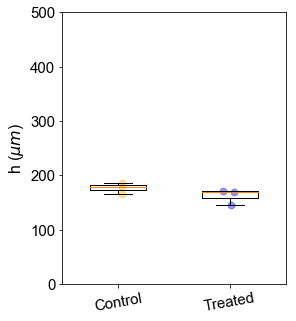

p-value: [0.24912539]


In [6]:
#SI: Effect of acridine orange on levitation properties of uninfected RBCs

#Load data
dataset = pd.read_csv('C:\Users\SSD_Laptop\Desktop\SD-notebook\Demirci\Data -ring stage paper, by figure\SI\Raw images\Fig. S7 Acridine orange effect on levitation\Fig. AO.csv')
df = dataset

vals, names, xs = [],[],[]
for i, col in enumerate(df.columns):
    vals.append(df[col].values)
    names.append(col)
    xs.append(np.random.normal(i + 1, 0.04, df[col].values.shape[0]))  # adds jitter to the data points - can be adjusted

plt.figure(figsize=(4,5))
plt.boxplot(vals, labels=['Control','Treated'], widths=0.5)
plt.xticks(fontsize=15, rotation=10)
plt.yticks(fontsize=15, rotation=0)
plt.ylim([0,500])
plt.ylabel('h (${\mu}m$)', fontname='Arial', fontsize = 16)
palette = ['orange', 'blue']
for x, val, c in zip(xs, vals, palette):
    plt.scatter(x, val, alpha=0.4, s=45, color=c)
plt.show()


#Welch's t-test on sample distribution
vals_arr = np.transpose(np.array([vals]))
t, prob = scipy.stats.ttest_ind(vals_arr[:,0],vals_arr[:,1], equal_var=False)
print 'p-value:', prob 


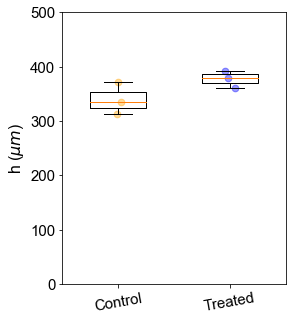

p-value: [0.14413622]


In [4]:
#SI: Effect of acridine orange on levitation properties of (nucleated) WBCs

#Load data
dataset = pd.read_csv('C:\Users\SSD_Laptop\Desktop\SD-notebook\Demirci\Data -ring stage paper, by figure\SI\Raw images\Fig. S7 Acridine orange effect on levitation\Fig. AO-WBC.csv')
df = dataset

vals, names, xs = [],[],[]
for i, col in enumerate(df.columns):
    vals.append(df[col].values)
    names.append(col)
    xs.append(np.random.normal(i + 1, 0.04, df[col].values.shape[0]))  # adds jitter to the data points - can be adjusted

plt.figure(figsize=(4,5))
plt.boxplot(vals, labels=['Control','Treated'], widths=0.5)
plt.xticks(fontsize=15, rotation=10)
plt.yticks(fontsize=15, rotation=0)
plt.ylim([0,500])
plt.ylabel('h (${\mu}m$)', fontname='Arial', fontsize = 16)
palette = ['orange', 'blue']
for x, val, c in zip(xs, vals, palette):
    plt.scatter(x, val, alpha=0.4, s=45, color=c)
plt.show()


#Welch's t-test on sample distribution
vals_arr = np.transpose(np.array([vals]))
t, prob = scipy.stats.ttest_ind(vals_arr[:,0],vals_arr[:,1], equal_var=False)
print 'p-value:', prob 
